In [1]:
!pip3 install carla

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import get_cmap
import numpy as np
import cv2
import json
import carla
from dgp.contribs.carla.carladgpagent import  get_initial_static_boxes, CarlaDGPAgent
from dgp.contribs.carla.carlatodgp import DGPSceneConstructor
from tqdm import tqdm
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Get the traffic generation script from here
#!wget https://raw.githubusercontent.com/carla-simulator/carla/master/PythonAPI/examples/generate_traffic.py

In [3]:
client = carla.Client('localhost', 2000)
client.set_timeout(20.0)

In [4]:
print(client.get_server_version())
print(client.get_client_version())
print(client.get_available_maps())

a1b37f7f
0.9.13
['/Game/Carla/Maps/Town01', '/Game/Carla/Maps/Town01_Opt', '/Game/Carla/Maps/Town02', '/Game/Carla/Maps/Town02_Opt', '/Game/Carla/Maps/Town03', '/Game/Carla/Maps/Town03_Opt', '/Game/Carla/Maps/Town04', '/Game/Carla/Maps/Town04_Opt', '/Game/Carla/Maps/Town05', '/Game/Carla/Maps/Town05_Opt', '/Game/Carla/Maps/Town10HD', '/Game/Carla/Maps/Town10HD_Opt', '/Game/Carla/Maps/Town06', '/Game/Carla/Maps/Town06_Opt', '/Game/Carla/Maps/Town07', '/Game/Carla/Maps/Town07_Opt', '/Game/Carla/Maps/Town11/Town11']


In [5]:
world = client.reload_world()
world = client.get_world()

client.load_world("Town06")

traffic_manager = client.get_trafficmanager(8000)
traffic_manager.set_synchronous_mode(True)

settings = world.get_settings()
settings.fixed_delta_seconds = .1
settings.synchronous_mode = True
settings.substepping = True
settings.max_substep_delta_time = 0.01
settings.max_substeps = 10

world.apply_settings(settings)

client.reload_world(False)

static_boxes = get_initial_static_boxes(world)

weather = world.get_weather()
world.set_weather(weather.ClearSunset)

world.tick()

2

In [1]:
vehicle.cleanup()

NameError: name 'vehicle' is not defined

In [6]:
from copy import deepcopy

In [12]:
def generate_fisheye_parts(cam, buffer=10, target=185, scale=1.0):
    cams = []

    fov2 = (target- cam['fov'])/2
    offset = (cam['fov'] + fov2)/2
    fov2 += 2*buffer

    w2 = cam['width']* fov2/cam['fov']
    h2 = cam['height']

    cam2 = deepcopy(cam)
    cam2['width'] = int(w2*scale)
    cam2['height'] = int(h2*scale)
    cam2['fov'] = fov2
    cam2['rvec'][2]-= offset
    cam2['name']+='_extra_a'
    cams.append(cam2)

    cam2 = deepcopy(cam)
    cam2['width'] = int(w2*scale)
    cam2['height'] = int(h2*scale)
    cam2['fov'] = fov2
    cam2['rvec'][2]+= offset
    cam2['name']+='_extra_b'
    cams.append(cam2)


    cam2 = deepcopy(cam)
    cam2['width'] = int(cam['width']*scale)
    cam2['height'] = int(w2*scale)
    cam2['rvec'][1]-= offset
    cam2['name']+='_extra_c'
    cams.append(cam2)

    cam2 = deepcopy(cam)
    cam2['width'] = int(cam['width']*scale)
    cam2['height'] = int(w2*scale)
    cam2['rvec'][1]+= offset
    cam2['name']+='_extra_d'
    cams.append(cam2)
    return cams


In [8]:
# create an agent
    
with open('../configs/car-acorn.json', 'rb') as f:
    car_spec = json.loads(f.read())
    
new_cams=[]
for cam in car_spec['datums']:
    if 'pvm' in cam['name']:
        new_cams.extend( generate_fisheye_parts(cam))
        
car_spec['datums'].extend(new_cams)


start_points = world.get_map().get_spawn_points()
start_point = np.random.choice(range(len(start_points)))
print(start_point)
transform = start_points[start_point]

transform.rotation.yaw = 0
vehicle = CarlaDGPAgent(world, car_spec['model'], None, transform,
                       car_spec['datums'], static_boxes = static_boxes)
world.tick()
#vehicle.ego.set_autopilot(True)
world.tick()

89


4

In [9]:
# At this point we should generate some traffic. Run generate_traffic.py in asynchronous mode

In [10]:
# Let all the actors wake up a bit
for i in range(10):
    world.tick()

In [13]:
# some helpful drawing utils

def dton(depth) -> np.ndarray:
    """Depth to image. Converts depth map to inverse depth image uint8 for drawing/display"""
    cmap = get_cmap('plasma')
    mask = depth <= 0
    depth[mask] = np.inf
    depth = 1 / (depth + 1e-5)
    depth = depth / np.percentile(depth, 95)
    x = 255 * cmap(depth)[:, :, :3]
    x = x.astype(np.uint8)
    x[mask] = 0
    return x

{'rgb', 'datum_name', 'timestamp', 'extrinsics', 'distortion', 'semantic_segmentation_2d', 'frame', 'pose', 'intrinsics', 'datum_type', 'depth'}
{'rgb', 'datum_name', 'timestamp', 'extrinsics', 'distortion', 'semantic_segmentation_2d', 'frame', 'pose', 'intrinsics', 'datum_type', 'depth'}
{'rgb', 'datum_name', 'timestamp', 'extrinsics', 'distortion', 'semantic_segmentation_2d', 'frame', 'pose', 'intrinsics', 'datum_type', 'depth'}
{'rgb', 'datum_name', 'timestamp', 'extrinsics', 'distortion', 'semantic_segmentation_2d', 'frame', 'pose', 'intrinsics', 'datum_type', 'depth'}
{'rgb', 'datum_name', 'timestamp', 'extrinsics', 'distortion', 'semantic_segmentation_2d', 'frame', 'pose', 'intrinsics', 'datum_type', 'depth'}
{'rgb', 'datum_name', 'timestamp', 'extrinsics', 'distortion', 'semantic_segmentation_2d', 'frame', 'pose', 'intrinsics', 'datum_type', 'depth'}
{'rgb', 'datum_name', 'timestamp', 'extrinsics', 'distortion', 'semantic_segmentation_2d', 'frame', 'pose', 'intrinsics', 'datum_t

/home/ubuntu/tri/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


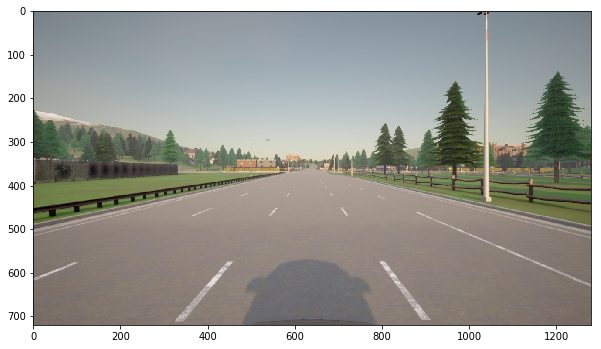

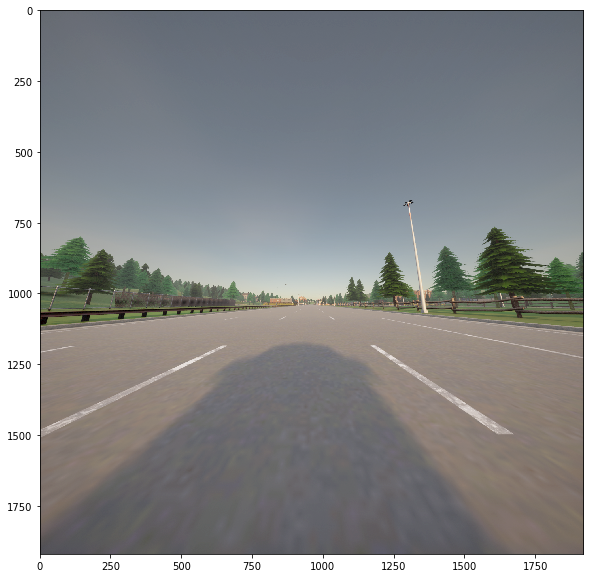

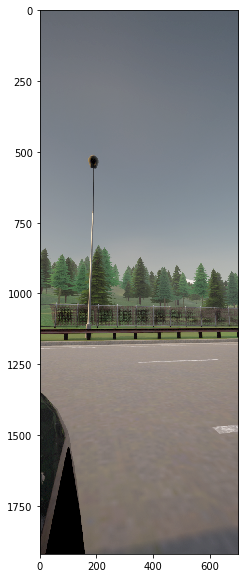

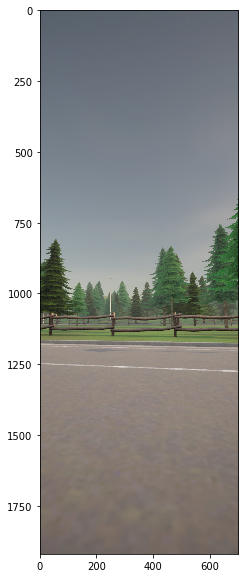

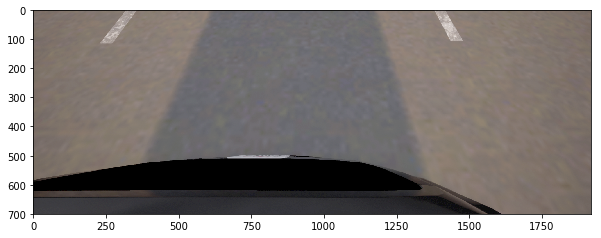

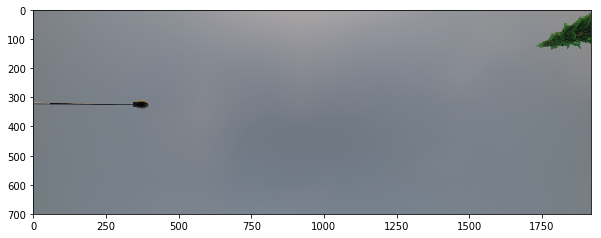

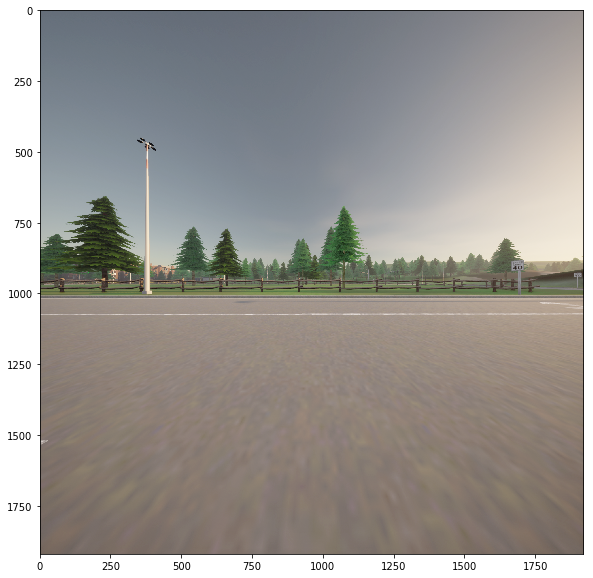

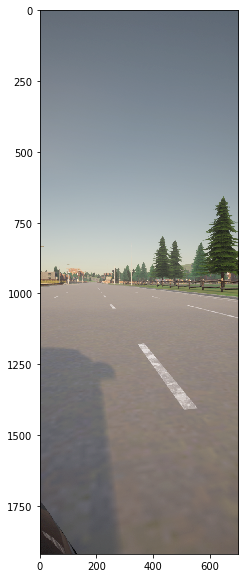

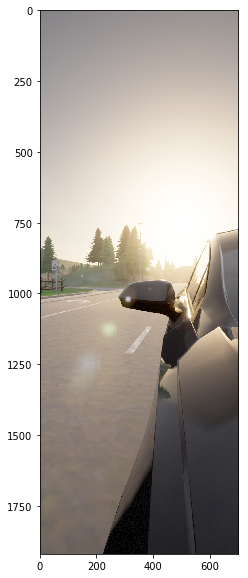

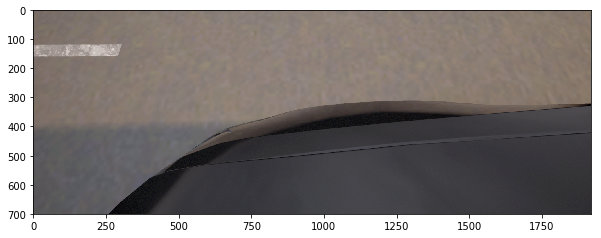

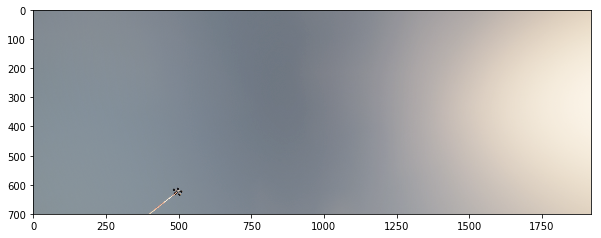

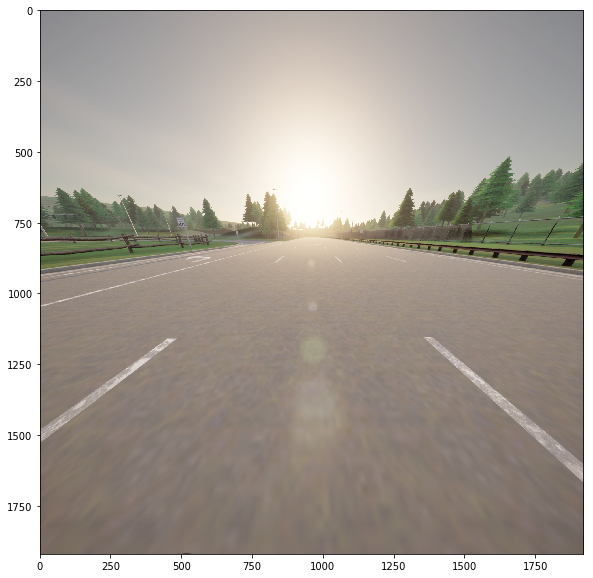

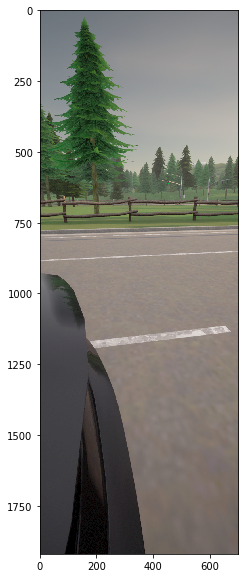

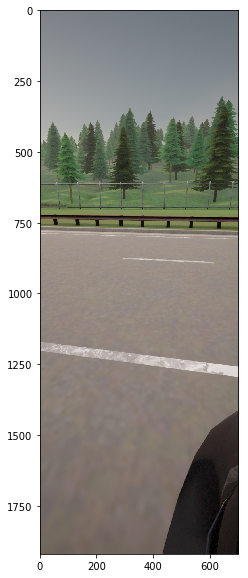

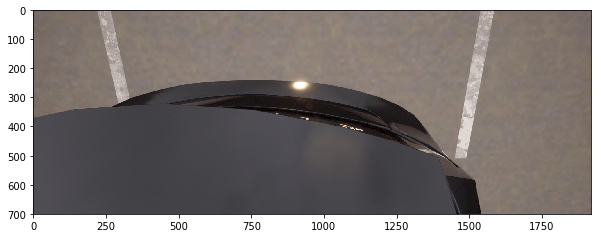

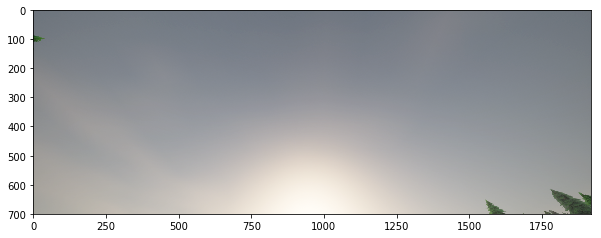

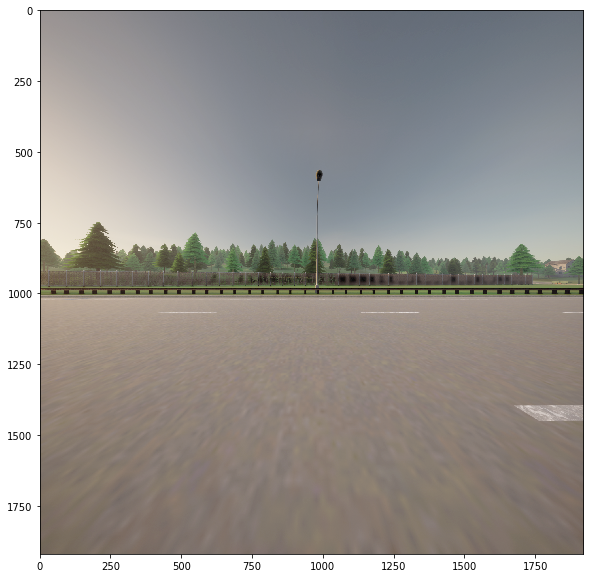

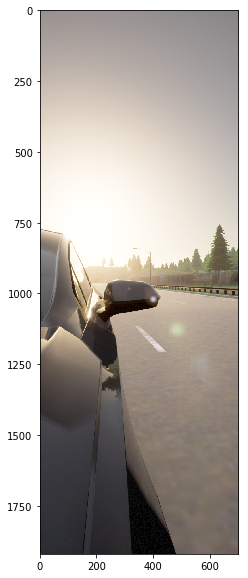

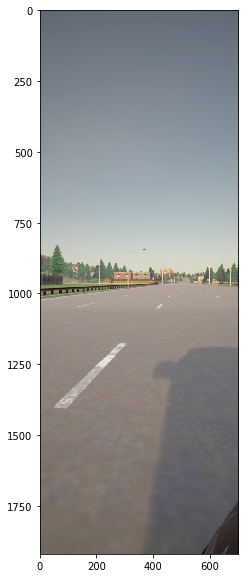

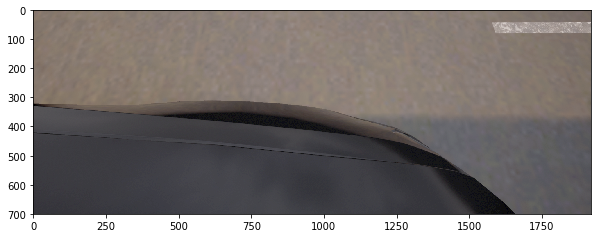

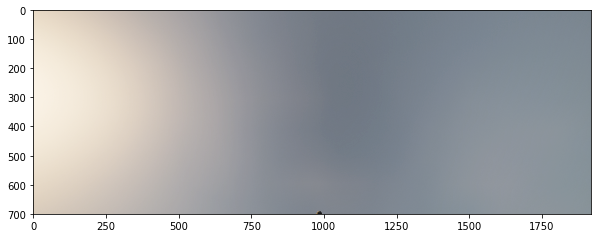

In [14]:
frame = world.tick(30) # << if on a remote host and/or with a slow simulator, allow a large timeout
sample = vehicle.get_sample(frame)

for datum in sample:
    print(set(datum.keys()))
    if 'rgb' not in datum:
        continue
        
    plt.figure(figsize=(10,10))
    plt.imshow( np.array(datum['rgb']))
    

# left, center, right = np.array(sample[1]['rgb']), np.array(sample[0]['rgb']), np.array(sample[2]['rgb'])

# x = np.hstack( [ left,center, right])#, cv2.cvtColor(disp, cv2.COLOR_GRAY2BGR)])
# dims = [
#             dton(sample[i]['depth'].depth) for i in [1,0,2]
#         ]

# y = np.hstack(dims)
# z = np.vstack([x,y])
# plt.figure(figsize=(30,10))
# plt.imshow(z)

In [15]:
import torch
from dgp.contribs.carla.utils import fisheyeify, ston, dton
from PIL import Image

def make_fisheye(h,w,f,xi,alpha, source_datum, cam_datums, lidar_datum):
    K_np = np.array([[f,0,w/2],[0,f,h/2],[0,0,1]]).astype(np.float32)
    K = torch.tensor(K_np)
    
    new_cam_pose = torch.Tensor(source_datum['pose'].matrix)
    depth, frame, semseg = fisheyeify(cam_datums, lidar_datum, new_cam_pose, K, h,w, xi,alpha)
    
    new_datum = deepcopy(source_datum)

    depth = depth.reshape(h,w).detach().cpu().numpy()
    semseg = semseg.detach().cpu().numpy().astype(np.uint8)
    rgb = (255*frame.detach().cpu().numpy()).astype(np.uint8)
    new_datum['intrinsics'] = K_np
    new_datum['distortion'] = {'xi':xi, 'alpha':alpha}
    new_datum['rgb'] = Image.fromarray(rgb)
    new_datum['depth']._depth = depth
    new_datum['semantic_segmentation_2d']._segmentation_image = semseg
    
    return new_datum
    
    

    
    

/home/ubuntu/tri/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
# import torch
# from dgp.contribs.carla.utils import fisheyeify, ston, dton
# s = 1.0#.9#1.045
# # Settings for 195 degree BF2M2020S23 lense (from ds paper) assuming optical center at middle of image
# h,w = int(s*2*514.39), int(s*2*638.66)
# h,w = 960,1280
# #h = int( (h+w)/2)
# #w=h
# #h = int(h)
# h,w = int(s*h), int(s*w)
# print(h,w)
# xi = -.18
# alpha = 0.59
# f= 337*s
# K = torch.tensor(np.array([[f,0,w/2],[0,f,h/2],[0,0,1]]).astype(np.float32))

# cam_datums = [datum for datum in sample if datum['datum_type']=='image'][1:6]
# lidar_datum = [datum for datum in sample if datum['datum_type']=='point_cloud'][0]

# new_cam_pose = torch.Tensor(cam_datums[0]['pose'].matrix)

# depth, frame, semseg = fisheyeify(cam_datums, lidar_datum, new_cam_pose, K, h,w, xi,alpha)
# print('depth', torch.min(depth))

# depth_im = dton(depth.reshape(h,w))
# ssimg = ston(semseg, frame)
# x= np.hstack([ depth_im, (255*frame.numpy()).astype(np.uint8), ssimg ])

# plt.figure(figsize=(10,10))
# plt.imshow(x)


In [151]:
physics = vehicle.ego.get_physics_control()
wheels = physics.wheels
wheels_RL = wheels[3]

In [101]:
rl = np.array([wheels_RL.position.x, wheels_RL.position.y,wheels_RL.position.z])

In [102]:
ego_tvec = vehicle.ego.get_transform().location
egoc = np.array([ego_tvec.x, ego_tvec.y, ego_tvec.z])

In [128]:
egoc-rl/100

array([ 1.40956543, -0.72460861, -0.30051249])

In [103]:
offset = egoc-rl/100
offset[1] = 0

In [104]:
lrc1 = np.array([1625.06, 0, 1861.5])/1000
lrc1 - offset

array([0.21549457, 0.        , 2.16201249])

In [105]:
pvm1 = np.array([4007.01, 172.63, 663.34])/1000
pvm1 - offset

array([2.59744457, 0.17263   , 0.96385249])

In [106]:
pvm2 = np.array([3124, 988.46, 853.09])/1000
pvm2 - offset

array([1.71443457, 0.98846   , 1.15360249])

In [107]:
pvm3 = np.array([-1085,-58,1020])/1000
pvm3 - offset

array([-2.49456543, -0.058     ,  1.32051249])

physics = vehicle.get_physics_control()
wheels = physics.wheels
wheel_FL = wheels[0]
wheel_FR = wheels[1]
wheels_RL = wheels[2]
wheels_RR = wheels[3]

wheel_location = wheel_FR.position  # Vector3D(x=-10369.056641, y=-3405.956055, z=36.998440)

vehicle.get_transform().location  # Vector3D(x=10, y=20 z=0.5)

In [24]:
!ls

dev-render-cam.ipynb  fake-fisheye3.jpeg  fisheye2.mp4	generate_traffic.py
example.ipynb	      fake-fisheye4.jpeg  fisheye3.mp4
fake-fisheye.jpeg     fisheye.gif	  fisheye4.mp4
fake-fisheye2.jpeg    fisheye.mp4	  fisheye5.mp4


In [16]:
# Save some scenes
for idx in range(1):
    scene_writer = DGPSceneConstructor('carla-x'+ str(idx))
    vehicle.ego.set_autopilot(True)

    #warm up
    for i in range(30):
        frame = world.tick(30)
        sample = vehicle.get_sample(frame)

    for i in tqdm(range(100)): # short 20 frame scene for example
        frame =world.tick(20.0)
        sample = vehicle.get_sample(frame)
        if sample is not None:
            scene_writer.create_new_sample()
            lidar_datum_idx = [idx for idx,datum in enumerate(sample) if datum['datum_name'] =='lidar'][0]
            lidar_datum = sample[lidar_datum_idx]

            scene_writer.add_point_cloud_datum(sample[-1])
            scene_writer.save_ontology(vehicle.ontology_table['bounding_box_3d'], 'bounding_box_3d')
            scene_writer.save_ontology(vehicle.ontology_table['semantic_segmentation_2d'], 'semantic_segmentation_2d')

            # add fisheye cameras
            to_skip = []
            fisheyes=[]
            for target in ['camera_pvm_1', 'camera_pvm_2','camera_pvm_3', 'camera_pvm_4']:
                source_datum = [datum for datum in sample if datum['datum_type']=='image' and datum['datum_name'] == target][0]
                cam_datums = [datum for datum in sample if datum['datum_type']=='image' and target in datum['datum_name'] ]
                lidar_datum = [datum for datum in sample if datum['datum_type']=='point_cloud'][0]
                replacement_datum = make_fisheye(960,1280,337, -.18, 0.59, source_datum, cam_datums, lidar_datum)
                to_skip.extend([datum['datum_name'] for datum in cam_datums])
                fisheyes.append(replacement_datum)
                
            for i in range(len(sample)):
                if i == lidar_datum_idx:
                    continue
                datum = sample[i]
                #datum['distortion'] = {'xi':0.0, 'alpha':0.0}
                if datum['datum_name'] in to_skip:
                    continue
                
                scene_writer.add_camera_datum(datum)
                
            for i in range(len(fisheyes)):
                datum = fisheyes[i]
                scene_writer.add_camera_datum(datum)
        else:
            print('skipping bad sample')

    scene_writer.dump_scene()
    print('done')

  0%|          | 0/100 [00:00<?, ?it/s]

saved ontology 1 1eda2bcf7cca89eb734bff70dadd0fd04877d83b carla-x0/ontology
saved ontology 2 219a97aac6f8e0870c6e48f0a4a574ce2d7e928a carla-x0/ontology


/home/ubuntu/tri/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 100/100 [15:21<00:00,  9.21s/it]

--------------------------------------------------------------------------------
From `DGPSceneConstructor.dump_scene`:
Datum name "lidar" has 100 datums
Datum name "camera_long_range_1" has 100 datums
Datum name "camera_pvm_1" has 100 datums
Datum name "camera_pvm_2" has 100 datums
Datum name "camera_pvm_3" has 100 datums
Datum name "camera_pvm_4" has 100 datums
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
done


In [ ]:
carlaz0/scene_e514af88208bd78d554daa22a7e5d62f2ac451ed.json

In [17]:
from dgp.datasets import SynchronizedScene

scene_json = 'carla-x0/scene_411e577a24f6e09604f9ff8205370397a572ab51.json'
datums = ['camera_long_range_1',  'camera_pvm_1','camera_pvm_2','camera_pvm_3','camera_pvm_4','lidar']
annotations = ['depth','semantic_segmentation_2d']
dataset = SynchronizedScene(scene_json, datums, annotations)
len(dataset)

100

In [18]:
sample = dataset[4][0]

In [19]:
front = np.array(sample[0]['rgb'])
h,w = front.shape[:2]
s = 960/h
fronts = cv2.resize(front, None, fx=s, fy=s)

In [20]:
np.array(sample[1]['rgb']).shape

(960, 1280, 3)

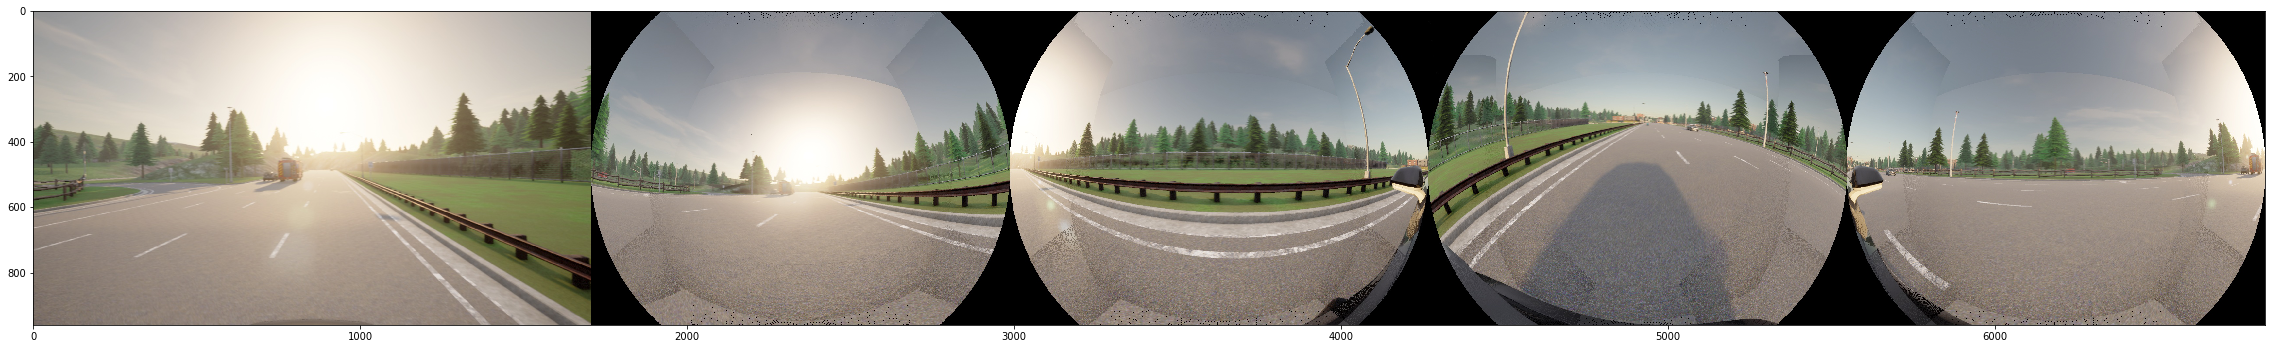

In [21]:
front = np.array(sample[0]['rgb'])
h,w = front.shape[:2]

fish = np.hstack( [fronts]+[ np.array(datum['rgb']) for datum in sample[1:5]])
plt.figure(figsize=(4*10,10))
plt.imshow(fish)

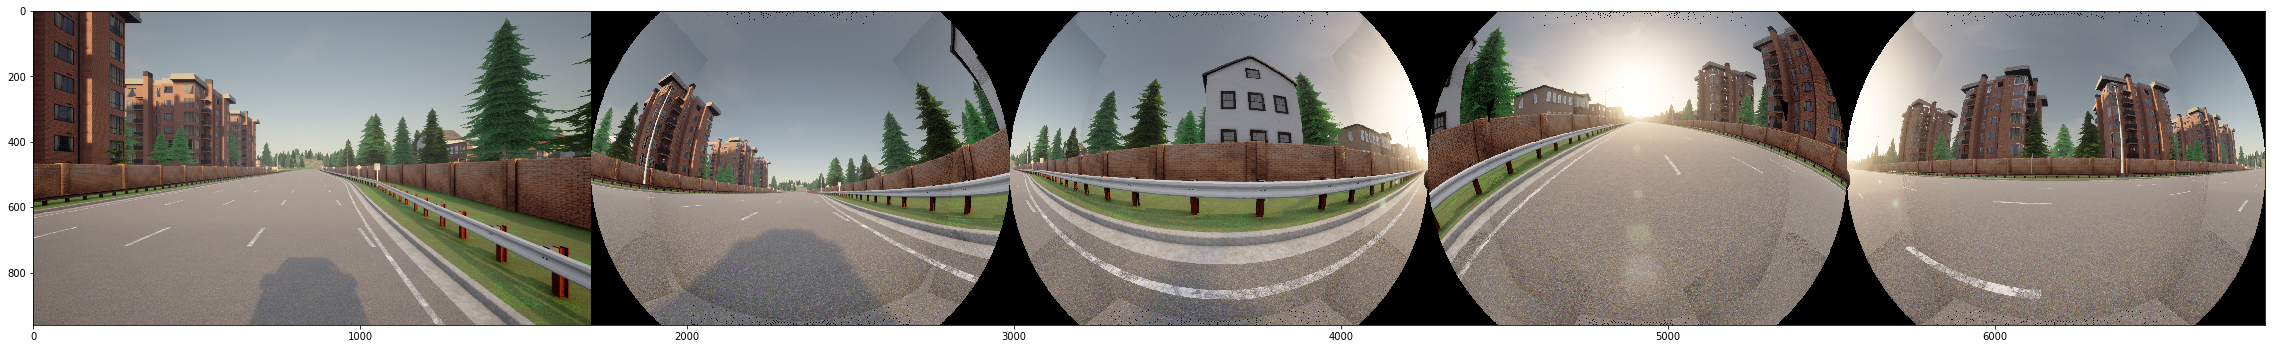

In [128]:
front = np.array(sample[0]['rgb'])
h,w = front.shape[:2]

fish = np.hstack( [fronts]+[ np.array(datum['rgb']) for datum in sample[1:5]])
plt.figure(figsize=(4*10,10))
plt.imshow(fish)

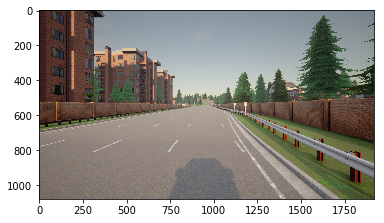

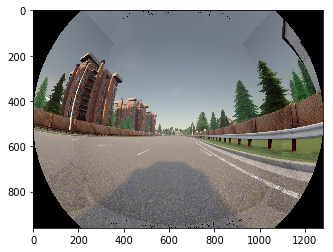

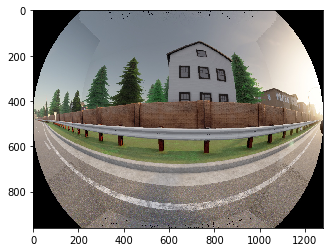

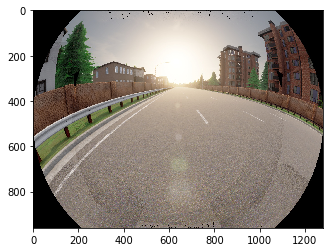

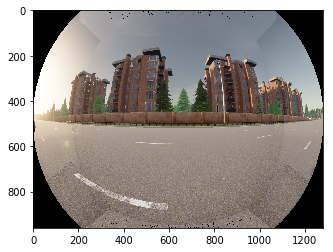

In [110]:
for datum in sample:
    if 'rgb' not in datum:
        continue
    plt.figure()
    plt.imshow( np.array(datum['rgb']))